In [39]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from LR_model import LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import seaborn as sns

In [40]:
def plot_correlation(X, name):
    corr = X.corr()
    f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=1, vmin = -1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
    f.suptitle(name)
    high_corr_pairs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.8:
                high_corr_pairs.append((corr.columns[i], corr.columns[j]))

    # Print pairs of columns with correlation > 0.8
    return(high_corr_pairs, name)

In [41]:
def delete_high_corr_cols(df):
    corr = df.corr()
    high_corr_pairs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.8:
                high_corr_pairs.append((corr.columns[i], corr.columns[j]))

    cols_to_drop = []
    for pair in high_corr_pairs:
        cols_to_drop.append(pair[0])
    cols_to_drop = list(set(cols_to_drop))
    df.drop(columns = cols_to_drop, inplace = True)
    return df

In [42]:
# https://archive.ics.uci.edu/dataset/20/census+income
def get_data_adult():
    df = pd.read_csv('data/adult.data', header=None)
    X = df.iloc[:, [0, 2, 4, 10, 11, 12]]
    y = [1 if x == ' <=50K' else 0 for x in df.iloc[:, 14]]
    return X, y

In [43]:
# https://archive.ics.uci.edu/dataset/850/raisin
def get_data_raisin():
    df = pd.read_csv('data/Raisin_Dataset.arff', skiprows=18, header=None)
    X = df.iloc[:, :7]
    y = [1 if x=='Kecimen' else 0 for x in df.iloc[:, 7]]
    return X, y

In [44]:
# https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik
def get_data_rice():
    df = pd.read_csv('data/Rice_Cammeo_Osmancik.arff', skiprows=16, header=None)
    X = df.iloc[:, :7]
    y = [1 if x=='Cammeo' else 0 for x in df.iloc[:, 7]]
    return X, y

## 10+ features

In [46]:
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
def get_data_cancer():
    df = pd.read_csv('data/wdbc.data', header=None)
    X = df.iloc[:, 2:]
    y = df.iloc[:, 1]
    y = [1 if x == 'M' else 0 for x in y]
    return X, y

In [47]:
# https://archive.ics.uci.edu/dataset/94/spambase
def get_data_spam():
    df = pd.read_csv('data/spambase.data', header=None)
    X = df.iloc[:, :57]
    y = df.iloc[:, 57]
    return X, y

In [48]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1471
def get_data_eeg():
    df = pd.read_csv('data/phplE7q6h.arff', skiprows=37, header=None)
    X = df.iloc[:, :14]
    y = df.iloc[:, 14]
    y = [0 if x == 1 else 1 for x in y]
    return X, y

In [49]:
# do wywalenia

# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1053
def get_data_jm1():
    df = pd.read_csv('data/jm1.arff', skiprows=356, header=None)
    X = df.iloc[:, :21]
    y = df.iloc[:, 21]
    y = [1 if x else 0 for x in y]
    return X, y

In [50]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=59
def get_data_ionosphere():
    df = pd.read_csv('data/dataset_59_ionosphere.arff', skiprows=104, skipfooter=3, header=None)
    X = df.iloc[:, :34]
    y = df.iloc[:, 34]
    y = [1 if x == 'g' else 0 for x in y]
    return X, y

In [51]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=40701
def get_data_churn():
    df = pd.read_csv('data/churn.arff', skiprows=28, header=None)
    X = df.iloc[:, [0, 1, 3] + [i for i in range(6, 19)]]
    y = df.iloc[:, 20]
    return X, y

In [85]:
from ucimlrepo import fetch_ucirepo
def get_data_default():
    default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
    X = default_of_credit_card_clients.data.features 
    y = default_of_credit_card_clients.data.targets 
    y = list(np.ravel(y.values))
    return X, y

In [86]:
datasets = {
    'adult': get_data_adult(),
    'raisin': get_data_raisin(),
    'rice': get_data_rice(),
    'default': get_data_default(),
    'cancer': get_data_cancer(),
    'spam': get_data_spam(),
    'eeg': get_data_eeg(),
    #'jm1': get_data_jm1(), has some issues with data
    'churn': get_data_churn(),
    'ionosphere' : get_data_ionosphere()
}
#adult, eeg, churn trudne zbiory

C:\Users\mipec\AppData\Local\Temp\ipykernel_25152\1412249511.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/dataset_59_ionosphere.arff', skiprows=104, skipfooter=3, header=None)


# correlations before deleting the problematic columns

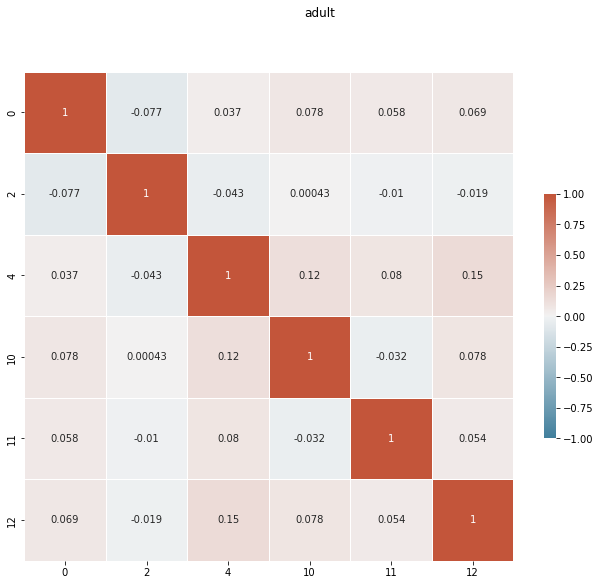

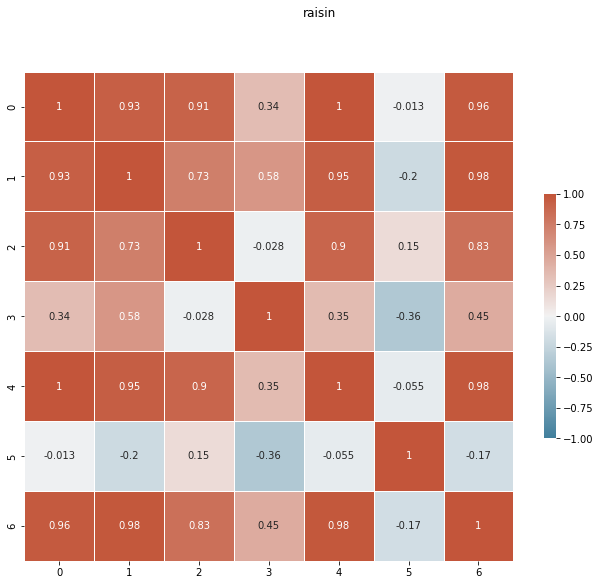

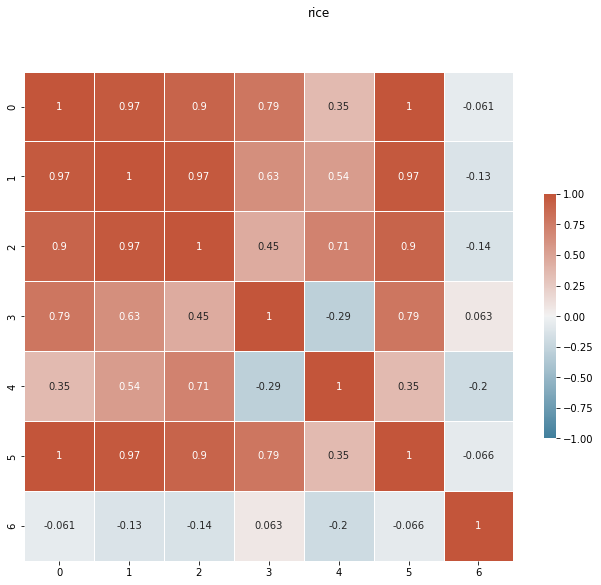

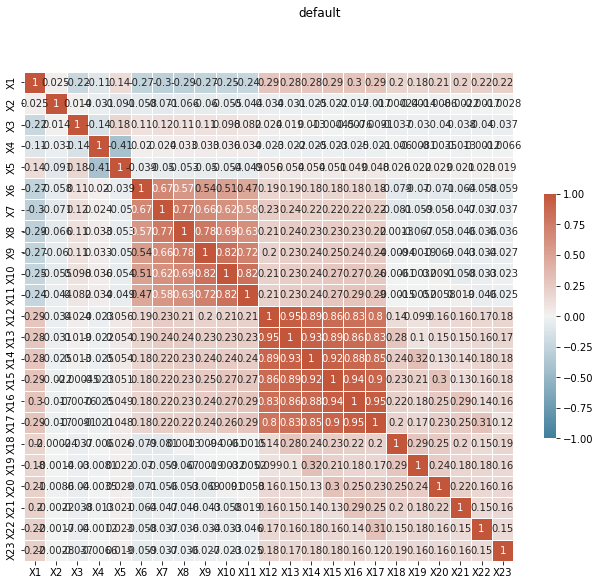

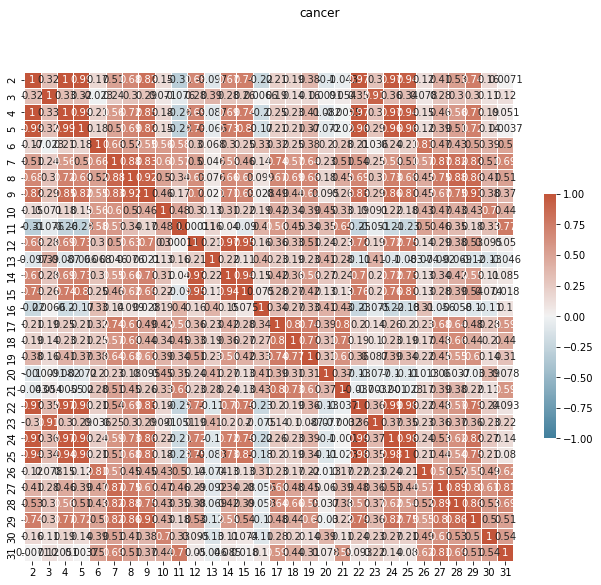

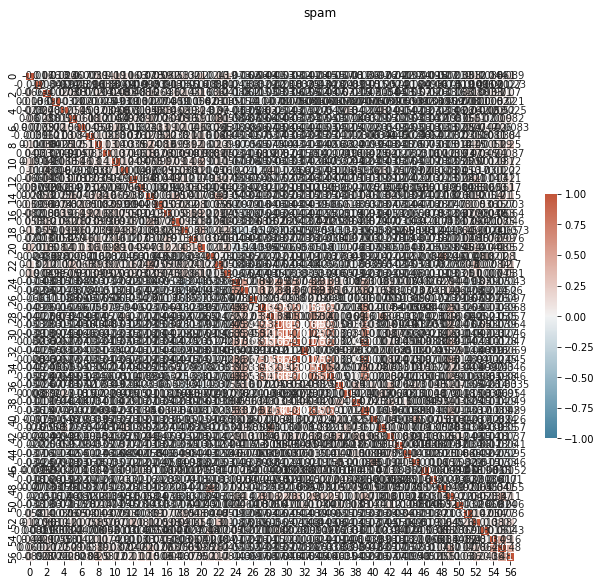

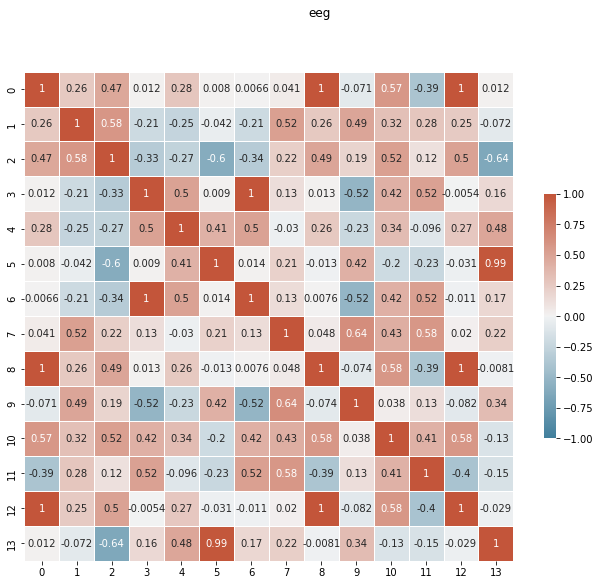

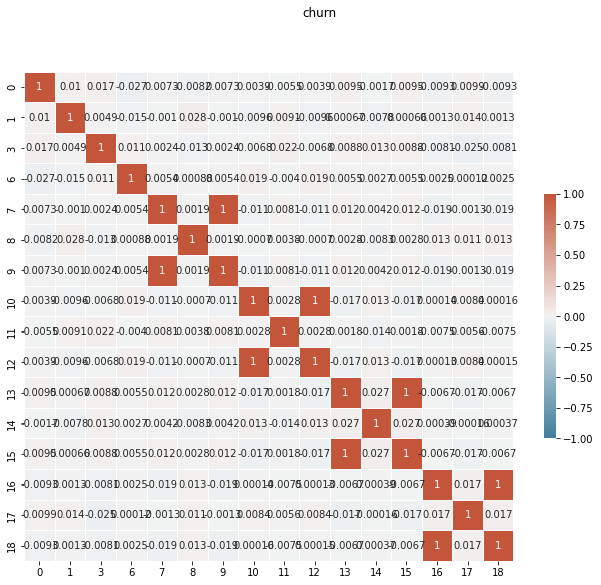

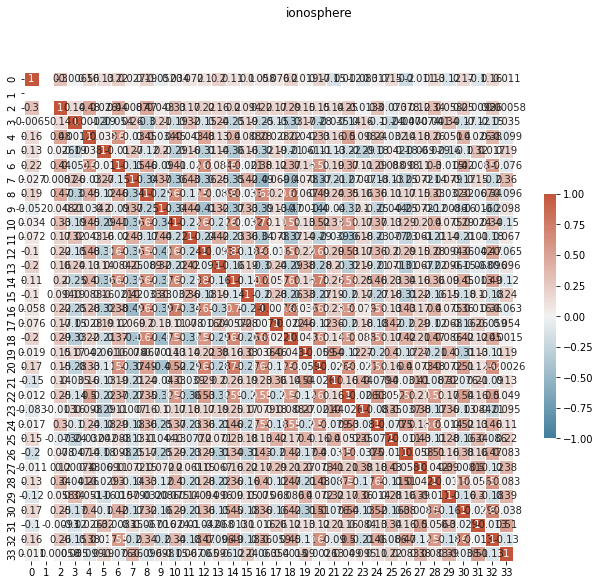

In [87]:
high_corr = {}
for dataset in datasets:
    pair = plot_correlation(datasets[dataset][0], dataset)
    if pair[0]:
        high_corr[pair[1]] = pair[0]

# correlations after deleting the problematic columns

In [88]:
for dataset in high_corr:
    cols_to_drop = []
    for pair in high_corr[dataset]:
        cols_to_drop.append(pair[0])
    cols_to_drop = list(set(cols_to_drop))
    datasets[dataset][0].drop(columns = cols_to_drop, inplace = True)

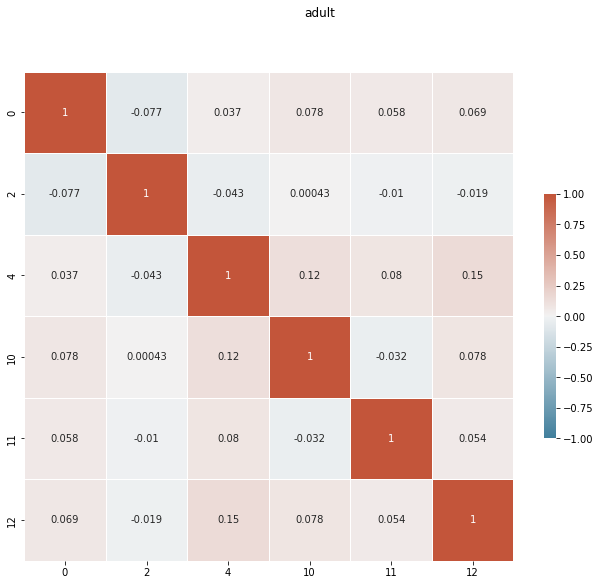

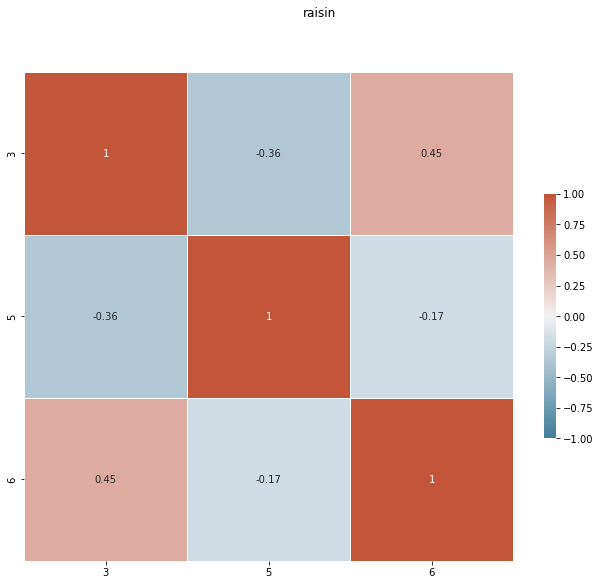

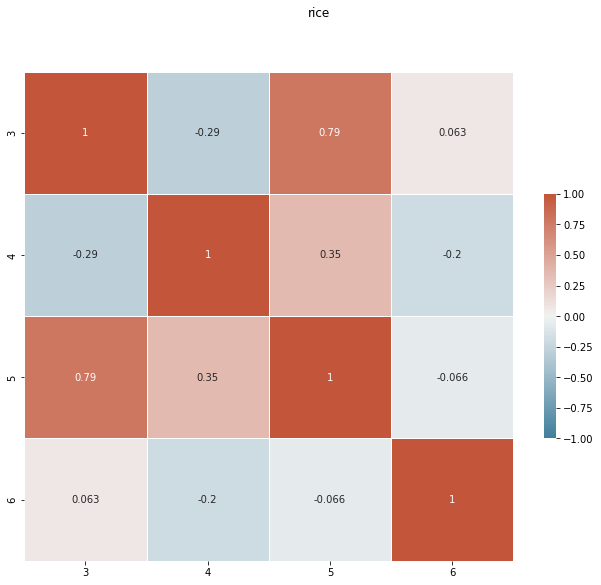

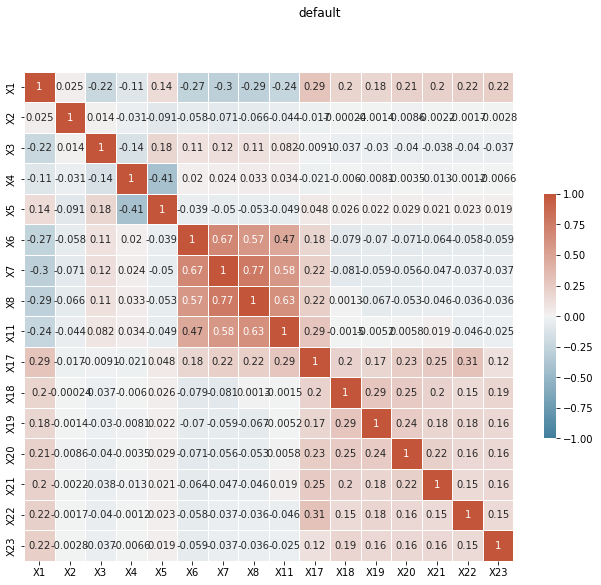

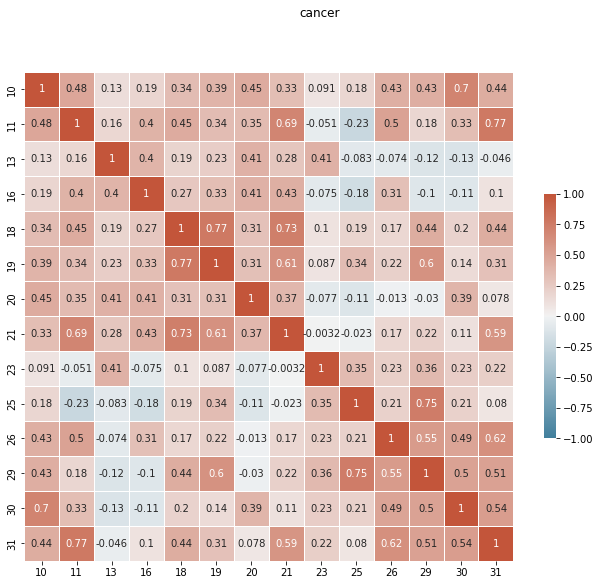

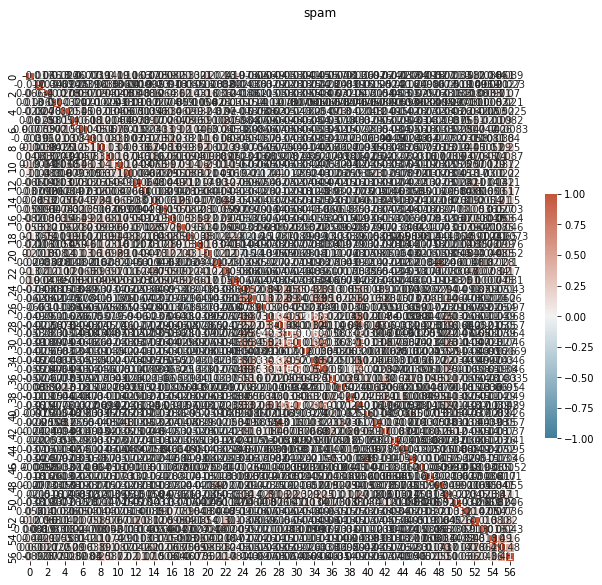

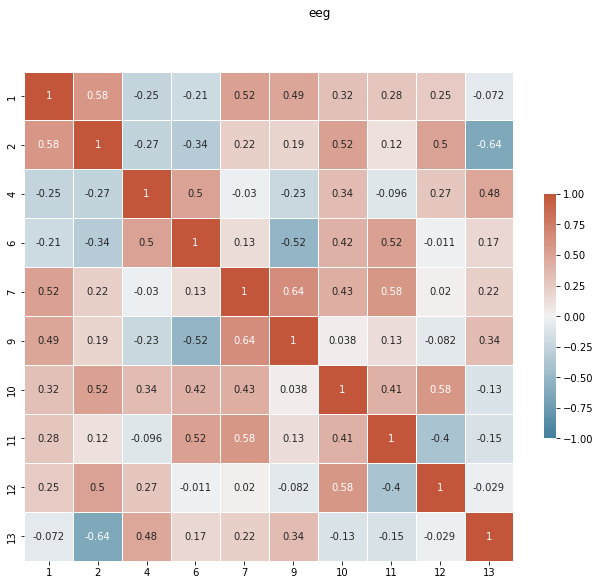

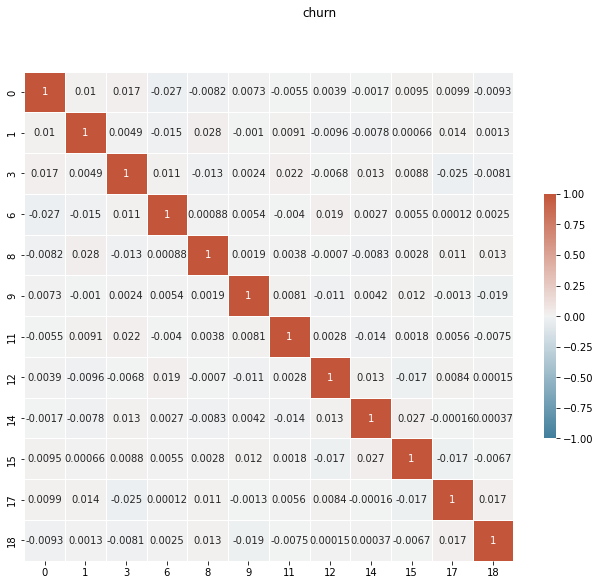

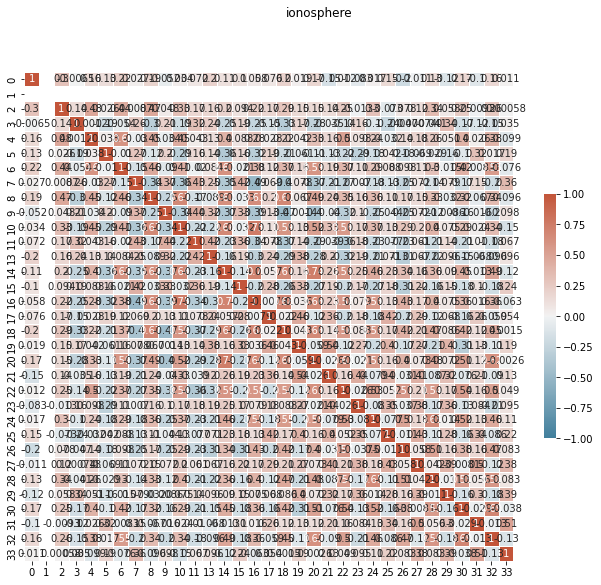

In [89]:
for dataset in datasets:
    plot_correlation(datasets[dataset][0], dataset)

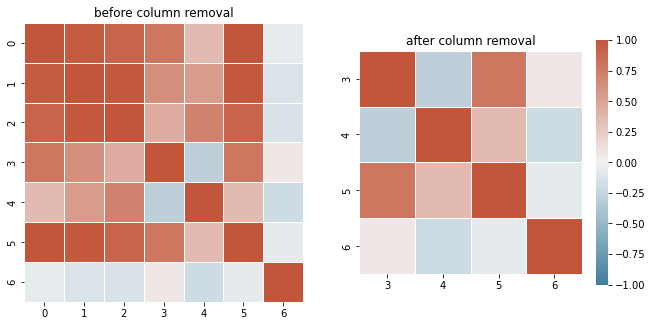

In [105]:
X, y = get_data_rice()
corr = X.corr()
X = delete_high_corr_cols(X)
corr2 = X.corr()
f, ax = plt.subplots(1,2, figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar = False, ax = ax[0])

sns.heatmap(corr2, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax[1])

ax[0].set_title('before column removal')
ax[1].set_title('after column removal')

plt.savefig('correlation_comparison.jpg', dpi = 200)